# Homework 3: Functions

## Due Friday, April 23th at 11:59pm

Welcome to Homework 3! This week, we will go over defining functions, histograms, and exploring data. You can find additional help on these topics in [Chapter 02](https://eldridgejm.github.io/dive_into_data_science/front.html) of the textbook.

### Instructions

This assignment is due Friday, April 23th at 11:59pm. You are given seven slip days thoughout the quarter which can extend the deadline by one day. See the syllabus for more details. With the exception of using slip days, late work will not be accepted unless you have made special arrangements with your instructor.

**Important**: The `otter` tests don't usually tell you that your answer is correct. More often, they help catch careless mistakes. It's up to you to ensure that your answer is correct. If you're not sure, ask someone (not for the answer, but for some guidance about your approach).

Remember that you may work in pairs for this assignment! If you work in a pair, you should submit one notebook to Gradescope for the both of you.

Directly sharing answers between groups is not okay, but discussing problems with the course staff or with other students is encouraged. 

You should start early so that you have time to get help if you're stuck. A calendar with lab hour times and locations appears on [the course webpage](http://dsc10.com).

In [1]:
# please don't change this cell, but do make sure to run it
import babypandas as bpd
import matplotlib.pyplot as plt
import numpy as np
import otter
grader = otter.Notebook()

## 1. Avocadopocalypse

In early 2017, reduced harvests and labor strikes caused avocado production in Mexico, Peru, and California to  dramatically decrease. In this problem we will investigate how and where prices fluctuated in response to the "avocadopocalypse".

The source of the avocado price data is [here](https://urldefense.com/v3/__http://www.hassavocadoboard.com/retail/volume-and-price-data__;!!Mih3wA!UQwVlo9PvACY7t4CCustkKZq0RfPE-hGk1xDpoo20dpsixLTa8OgXRoiGUehMic$ ). We will use a subset of the data. The data has the following columns:

|Column|Description|
|------|-----------|
|Date|The date on which a price was recorded in YEAR-MONTH format|
|Type|The type of avocado. Either "conventional" or "organic".|
|Region|Where the price was recorded.|
|Price|The average avocado price for that time period/location.|
|Volume|The number of avocados sold (in thousands).|

**Question 1.1.** The data are in a CSV called `avocado.csv`. Read this file into a table named `avocado`. There is not good columns to use as the index, so don't set one!

In [2]:
avocado = bpd.read_csv('data/avocado.csv')
avocado

,Date,Region,Type,Price,Volume
0,2015-01,Boise,conventional,1.0750,66.582385
1,2016-06,Sacramento,conventional,1.1925,498.762617
2,2016-10,Indianapolis,organic,1.7080,3.403160
3,2017-03,Indianapolis,organic,1.1975,6.276205
4,2017-09,StLouis,organic,2.6750,4.368665
...,...,...,...,...,...
4129,2015-09,BaltimoreWashington,organic,1.5575,11.213677
4130,2015-03,GrandRapids,conventional,1.0800,199.245174
4131,2015-09,SouthCentral,organic,1.5125,65.335567
4132,2018-01,Charlotte,conventional,1.3050,268.444935


In [3]:
grader.check("q1_1")

q1_1 passed!

It might look like the `Date` column would make a good index, but it turns out that its entries are not unique! We can see this using the `.describe()` method, which gives us some useful information about a column:

In [4]:
avocado.get('Date').describe()

count        4134
unique         39
top       2016-09
freq          106
Name: Date, dtype: object

We see that although there are 4134 entries, only 39 of them are unique. This is because the same date will appear once for each city in the data set.

**Question 1.2.** Assign `cheapest` to the name of the region which had the cheapest avocados (of any type, and any date), and similarly assign `most_expensive` to the name of the region with the most expensive avocados (of any type, and any date).

In [5]:
cheapest = avocado.groupby('Region').min().get('Price').sort_values().index[0]
most_expensive = avocado.groupby('Region').max().get('Price').sort_values().index[-1]

In [6]:
grader.check("q1_2")

q1_2 passed!

**Question 1.3.** Avocados are sold in two types: organic and conventional. Make a table named `organic` containing only the data for organic avocados, and a table named `conventional` for conventional avocados.

In [7]:
organic = avocado[avocado.get('Type') == 'organic']
conventional = avocado[avocado.get('Type') == 'conventional']

In [8]:
grader.check("q1_3")

q1_3 passed!

**Question 1.4.** Create a table named `sd_total` which contains one column, `Volume`. The `Volume` column should be equal to the total volume of avocados (organic + conventional) sold in San Diego for each date. The index of your table should contain the dates.

*Hint*: if you do this right, you won't need to use `.set_index()` to make the date the row label.

*Hint*: Are the region names separated by a space?

In [9]:
sd_total = avocado[avocado.get('Region') == 'SanDiego'].groupby('Date').sum().drop(columns='Price')
sd_total

,Volume
Date,
2015-01,484.678510
2015-02,550.288003
2015-03,513.243538
2015-04,488.004870
2015-05,579.081808
...,...
2017-11,443.204205
2017-12,545.614502
2018-01,501.497322


In [10]:
grader.check("q1_4")

q1_4 passed!

**Question 1.5.** Create a table named `median_price` containing one column named `MedianPrice` containing the median price of **conventional avocados** sold on each date. Your table should have one row for each date, and the row label should be the date.

In [11]:
median_price = avocado[avocado.get('Type') == 'conventional'].groupby('Date').median().drop(columns='Volume')
median_price = median_price.assign(MedianPrice=median_price.get('Price')).drop(columns='Price')
median_price

,MedianPrice
Date,
2015-01,1.1150
2015-02,1.0725
2015-03,1.1220
2015-04,1.1175
2015-05,1.1160
...,...
2017-11,1.3100
2017-12,1.1460
2018-01,1.2050


In [12]:
grader.check("q1_5")

q1_5 passed!

**Question 1.6.** Plot the median price of conventional avocados in the entire US as a function of date. Does the data support the "avocadopocalypse"; that is, were prices higher in 2017? Describe how you could use the given data to investigate the *reason* that prices were higher.

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q1_6
manual: true
-->

<AxesSubplot:xlabel='Date'>

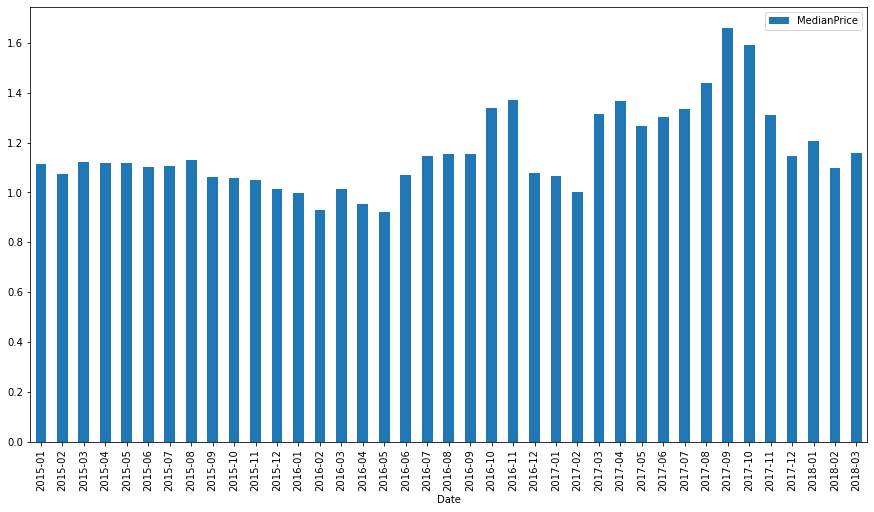

In [13]:
# Make your plot here
median_price.plot(kind='bar', figsize=[15,8])

Data supports the 'avocadopocalypse' as median prices in 2017 were higher. The data shows that prices were at highest in 2017-09 and 2017-10--same thing occured in the same months of 2016. So this could suggest that, aside from overall median prices being higher in 2017 than other years, price increases may be somehow related to July, August, and September months. 

<!-- END QUESTION -->



## 2. Power Outages


The dataset below contains information about power outages that occurred in North America between 2000 to 2014. The data is a subset of the data available [here](https://urldefense.com/v3/__https://www.kaggle.com/autunno/15-years-of-power-outages__;!!Mih3wA!UQwVlo9PvACY7t4CCustkKZq0RfPE-hGk1xDpoo20dpsixLTa8OgXRoiwcEkHHY$ ).  Run the next cell to load the data.

In [14]:
# just run this cell
power = bpd.read_csv("data/powerdata.csv")
power

,Event Description,Year,Time Event Began,Date of Restoration,Time of Restoration,Respondent,Geographic Areas,NERC Region,Number of Customers Affected,Tags
0,Severe Weather - Thunderstorms,2014,8:00 PM,7/2/2014,6:30 PM,Exelon Corporation/ComEd,Illinois,RFC,"420,000","severe weather, thunderstorm"
1,Severe Weather - Thunderstorms,2014,11:20 PM,7/1/2014,5:00 PM,Northern Indiana Public Service Company,North Central Indiana,RFC,"127,000","severe weather, thunderstorm"
2,Severe Weather - Thunderstorms,2014,5:55 PM,7/1/2014,2:53 AM,We Energies,Southeast Wisconsin,MRO,"120,000","severe weather, thunderstorm"
3,Fuel Supply Emergency - Coal,2014,1:21 PM,Unknown,Unknown,We Energies,Wisconsin,MRO,Unknown,"fuel supply emergency, coal"
4,Physical Attack - Vandalism,2014,2:54 PM,6/24/2014,2:55 PM,Tennessee Valley Authority,"Nashville, Tennessee",SERC,Unknown,"vandalism, physical"
...,...,...,...,...,...,...,...,...,...,...
1647,Transmission Line Loss,2000,4:00 p.m.,3/18/2000,5:10:00 PM,El Paso Elec. Co.,Texas,MAIN,"100,000",transmission interruption
1648,Vandalism,2000,9:06 p.m.,NaN,NaN,Alliant Energy,Maine,MAIN,NaN,vandalism
1649,Ice Storm,2000,10:00 p.m.,2/3/2000,12:00:00 PM,Duke Power Co.,South Carolina,SERC,"81,000","severe weather, winter storm"
1650,Ice Storm,2000,7:00 p.m.,NaN,NaN,Carolina Power & Light,North Carolina & Northern South Carolina,SERC,"173,000","severe weather, winter storm"


**Question 2.1.** Find the proportion of all power outages that occured in the year 2013. Save your answer to the variable `outage_2013`.

In [15]:
outage_2013 = (power[power.get('Year') == 2013].get('Year').count()) / (power.get('Year').count())
outage_2013

0.1053268765133172

In [16]:
grader.check("q2_1")

q2_1 passed!

**Question 2.2.** Make a horizontal bar chart showing the number of outages per NERC Region. Make sure that the bars are sorted from longest to shortest. You can learn more about what a NERC region is [here](https://www.nerc.com/Pages/default.aspx).

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q2_2
manual: true
-->

<AxesSubplot:ylabel='NERC Region'>

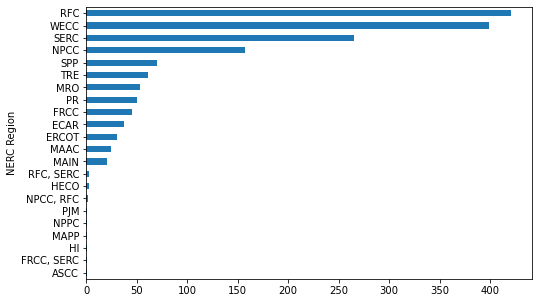

In [17]:
#put your code here
barc = power.groupby('NERC Region').count().get('Year').sort_values()
barc.plot(kind='barh', figsize=[8,5])

<!-- END QUESTION -->



**Question 2.3.** Draw a line plot of the count of power outages by year.

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q2_3
manual: true
-->

<AxesSubplot:xlabel='Year'>

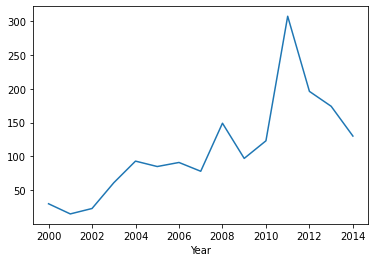

In [18]:
#put your code here
power.groupby('Year').count().get('Event Description').plot(kind='line')

<!-- END QUESTION -->



**Question 2.4.** We notice that there is a spike in power outages in the year 2011. Let's explore some of the data of the outages in the year 2011. Create a table named `power_2011` which has one column, `Count`, which is a count of the number of times that `Event Description` occured in 2011. The index should contain the event descriptions.

In [19]:
power_2011 = power[power.get('Year') == 2011].groupby('Event Description').count()
power_2011 = power_2011.drop(
    columns=['Time Event Began', 'Date of Restoration', 'Time of Restoration' , 'Respondent',
            'Geographic Areas', 'NERC Region', 'Number of Customers Affected', 'Tags']
)
power_2011 = power_2011.assign(Count=power_2011.get('Year')).drop(columns='Year')
power_2011

,Count
Event Description,
Actual Physical Attack,1
Cold Weather Event,1
Distribution System Interruption,1
Earthquake,1
Electrical Fault at Generator,1
...,...
Transmission Level Interruption,1
Transmission Level Outage,1
Transmission/Distribution Interruption; Load Shed; Generation Inadequacy,1


In [20]:
grader.check("q2_4")

q2_4 passed!

**Question 2.5.** How many outages were there in Texas in 2012?

*Hint*: There are many geographic areas in Texas. For instance, "Central Texas" is one, "Texas" is another.

In [21]:
texas_outages = power[power.get('Geographic Areas').str.contains('Texas')].shape[0]
texas_outages

104

In [22]:
grader.check("q2_5")

q2_5 passed!

## 3. Defining Functions

In this problem we'll define functions for working with coordinates.
A coordinate in 2-dimensional space is easily represented with a Python list of length two. For instance, the point $(1,3)$ can be represented as:

In [23]:
[1, 3]

[1, 3]

**Question 3.1.** 

Define a function named `find_slope` that takes in two coordinates, [x1, y1] and [x2, y2], and returns the slope of the line connecting the two points. Assume x1 and x2 are not equal.

In [24]:
def find_slope(coordinate_1, coordinate_2):
    return ((coordinate_2[1] - coordinate_1[1]) / (coordinate_2[0] - coordinate_1[0]))

In [25]:
grader.check("q3_1")

q3_1 passed!

**Question 3.2.** Define a function named `find_intercepts` that takes in two coordinates, [x1, y1] and [x2, y2], and returns the x-intercept and y-intercept of the line connecting the two points. Assume x1 and x2 are not equal and that y1 and y2 are not equal.

*Hint*: The `find_slope` function may help you.

In [26]:
def find_intercepts(coordinate_1, coordinate_2):
    x = coordinate_1[0]
    y = coordinate_1[1]
    m = find_slope(coordinate_1, coordinate_2)
    y_intercept = y - (m * x)
    x_intercept = 0 - m * x
    return (x_intercept, y_intercept)

find_intercepts([5,2],[7,2])

(0.0, 2.0)

In [27]:
grader.check("q3_2")

q3_2 passed!

One of the simplest ways of predicting the future is to assume that change happens linearly. For instance, suppose a person's height at 10 years old is 48 inches, and their height at 14 years old is 53 inches. We can predict their height at 20 years of age by drawing a straight line between (10, 48) and (14, 53), and finding its value at x = 20.

**Question 3.3.** Define a function named `predict_heights` that takes in two coordinates [age_1, height_1] and [age_2, height_2] and the age to predict the person's height for. Return the predicted height. Assume age_1 and age_2 are not equal. Assume height_1 and height_2 are not equal.

In [28]:
def predict_heights(age_and_height_1, age_and_height_2, age_to_predict):
    change = find_slope(age_and_height_1,age_and_height_2)
    predicted_height = ( (age_to_predict - age_and_height_2[0]) * change ) + age_and_height_2[1]
    return predicted_height

In [29]:
grader.check("q3_4")

q3_4 passed!

**Question 3.4.** Is this a good way of predicting heights? When might it give poor results?

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q3_4
manual: true
-->

No, this is not a good way of predicting heights because one's height does not grow linearly as it stops when adolescence hits. 

<!-- END QUESTION -->



## 4. Olympic Medals

In this question, we will analyze data on Olympic athletes who won medals in the Winter Olympic Games from 1896-2014. You can find the data [here](https://www.kaggle.com/the-guardian/olympic-games#dictionary.csv)

The data is in a CSV file called `winter.csv`. Read this file into a table named `winter`. There is no good index, we will leave it unset.

In [30]:
winter_data = bpd.read_csv('data/winter.csv')
winter_data

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze
3,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze
4,1924,Chamonix,Biathlon,Biathlon,"AUFDENBLATTEN, Adolf",SUI,Men,Military Patrol,Gold
...,...,...,...,...,...,...,...,...,...
5765,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze
5766,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold
5767,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver
5768,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold


The `Country` column contains International Olympic Committee (IOC) [country codes](https://olympics.fandom.com/wiki/List_of_IOC_country_codes). We want to convert these country codes into actual country names that everyone can understand.

We'll use a Python [dictionary](https://www.tutorialspoint.com/python/python_dictionary.htm) to help us with this conversion. A dictionary is a simple way to map a unique key to a value. For example, the below dictionary maps course codes to course names.

In [31]:
dsc_courses = {
    'DSC 10': 'Principles of Data Science',
    'DSC 20': 'Programming and Basic Data Structures for Data Science',
    'DSC 30': 'Data Structures and Algorithms for Data Science',
    'DSC 40A': 'Theoretical Foundations of Data Science I',
    'DSC 40B': 'Theoretical Foundations of Data Science II',
    'DSC 80': 'The Practice and Application of Data Science'
}

We can access the value corresponding to each key using bracket notation.

In [32]:
dsc10_name = dsc_courses['DSC 10']
dsc10_name

'Principles of Data Science'

Here, `DSC 10` is the key and `Principles of Data Science` is the value.

Let's use a dictionary to help us with our country code to country name conversion. Below is a dictionary containing country codes as keys and country names as values for each of the countries in our dataset of Winter Olympic medal winners.

In [33]:
country_codes = {
 'USA': 'United States',
 'CAN': 'Canada',
 'NOR': 'Norway',
 'URS': 'Soviet Union',
 'FIN': 'Finland',
 'SWE': 'Sweden',
 'GER': 'Germany',
 'SUI': 'Switzerland',
 'AUT': 'Austria',
 'RUS': 'Russia',
 'ITA': 'Italy',
 'GDR': 'East Germany',
 'TCH': 'Czechoslovakia',
 'FRA': 'France',
 'NED': 'Netherlands',
 'FRG': 'West Germany',
 'KOR': 'Korea, South',
 'CHN': 'China',
 'GBR': 'United Kingdom',
 'CZE': 'Czech Republic',
 'JPN': 'Japan',
 'EUN': 'Unified Team',
 'POL': 'Poland',
 'EUA': 'United Team of Germany',
 'SLO': 'Slovenia',
 'AUS': 'Australia',
 'BLR': 'Belarus',
 'LAT': 'Latvia',
 'BEL': 'Belgium',
 'HUN': 'Hungary',
 'UKR': 'Ukraine',
 'CRO': 'Croatia',
 'LIE': 'Liechtenstein',
 'YUG': 'Yugoslavia',
 'EST': 'Estonia',
 'KAZ': 'Kazakhstan',
 'BUL': 'Bulgaria',
 'DEN': 'Denmark',
 'SVK': 'Slovakia',
 'ROU': 'Romania',
 'ESP': 'Spain',
 'PRK': 'Korea, North',
 'LUX': 'Luxembourg',
 'NZL': 'New Zealand',
 'UZB': 'Uzbekistan'}

**Question 4.1.** Using `country_codes`, define a function named `code_to_country` that takes as input a country code and returns the corresponding country name. (Should be only one line)

In [34]:
def code_to_country(code):
    return country_codes[code]

In [35]:
grader.check("q4_1")

q4_1 passed!

**Question 4.2.** Using your `code_to_country` function, use `.get(col).apply()` to convert all of the country codes into country names in the `Country` column. Do this without creating an additional column. Store your result in `winter`.

*Hint*: Is there a way to use the `.assign` method to *replace* values in these two columns without creating additional columns?

In [36]:
winter = winter_data.assign(
    Country=winter_data.get('Country').apply(code_to_country)
)    
winter

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",France,Men,Military Patrol,Bronze
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",France,Men,Military Patrol,Bronze
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",France,Men,Military Patrol,Bronze
3,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",France,Men,Military Patrol,Bronze
4,1924,Chamonix,Biathlon,Biathlon,"AUFDENBLATTEN, Adolf",Switzerland,Men,Military Patrol,Gold
...,...,...,...,...,...,...,...,...,...
5765,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",United Kingdom,Women,Slopestyle,Bronze
5766,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",United States,Women,Slopestyle,Gold
5767,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",Canada,Women,Snowboard Cross,Silver
5768,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",Czech Republic,Women,Snowboard Cross,Gold


In [37]:
grader.check("q4_2")

q4_2 passed!

**Question 4.3.** 
Define a function named `lastname_length` that returns the length of the last name of a name. It should take as an input the name of the athlete. Notice that the name consists of the 'lastname, firstname' of the athlete.

*Hint:* Use the string function [`.split()`](https://docs.python.org/3/library/stdtypes.html#str.split). This is useful in splitting the name into a lastname and a firstname.

*Hint:* Notice that there is a space after the comma. 

In [38]:
def lastname_length(name):
    lastname = name.split(',')[0]
    return len(lastname)

In [39]:
grader.check("q4_3")

q4_3 passed!

**Question 4.4.** Create a function named `mean_values` that takes as an input the name of a country and returns the mean last name length of the athletes from that country. 

*Hint:* use the previously defined function!

In [40]:
def mean_values(country):
    return winter[winter.get('Country') == country].get('Athlete').apply(lastname_length).mean()

In [41]:
grader.check("q4_4")

q4_4 passed!

**Question 4.5.** 
Create a table called `last_names` with original columns `Year`, `Sport`, `Athlete` and `Country` and new column `Last_Name_Length` that has the length of the last name, with the shortest name at the top and longest at bottom.

*Hint*: Remember that you can create intermediate variables. This is a good time to do so!

In [42]:
last_names = winter.drop(columns=['City','Discipline','Gender','Event', 'Medal'])
last_names = last_names.assign(Last_Name_Length=last_names.get('Athlete').apply(lastname_length)).sort_values(by='Last_Name_Length', ascending=True)
last_names

,Year,Sport,Athlete,Country,Last_Name_Length
3903,2002,Skating,"AN, Yulong",China,2
5091,2010,Skiing,"LI, Nina",China,2
3565,1998,Skiing,"XU, Nannan",China,2
3886,2002,Skating,"LI, JiaJun",China,2
5486,2014,Skating,"AN, Victor",Russia,2
...,...,...,...,...,...
2421,1988,Skiing,"KINSHOFER GUETHLEIN, Christa",West Germany,19
2417,1988,Skiing,"KINSHOFER GUETHLEIN, Christa",West Germany,19
5083,2010,Skiing,"SACHENBACHER-STEHLE, Evi",Germany,19
5057,2010,Skiing,"SACHENBACHER-STEHLE, Evi",Germany,19


In [43]:
grader.check("q4_5")

q4_5 passed!

**Question 4.6.** What is the length of the longest last name? Assign this number to `longest_name_length`. What is the length of the shortest last name? Assign this number to `shortest_name_length`. What is the length difference between the longest and shortest last name? Assign this number to `range_name_length`.

In [44]:
longest_name_length = last_names.get('Last_Name_Length').max()
shortest_name_length = last_names.get('Last_Name_Length').min()
range_name_length = longest_name_length - shortest_name_length
range_name_length

20

In [45]:
grader.check("q4_6")

q4_6 passed!

**Question 4.7.** Make a function called `point_total` that takes in a country name (string) and awards points based on olympic medals. The country gets 1 point for every bronze medal, 3 points for every silver and 5 for every gold.

In [46]:
def point_total(country):
    sorting = winter[winter.get('Country') == country].groupby('Medal').count()
    gold = (sorting.loc['Gold'].max()) * 5
    silver = (sorting.loc['Silver'].max()) * 3
    bronze = sorting.loc['Bronze'].max()
    return gold + silver + bronze

In [47]:
grader.check("q4_7")

q4_7 passed!

**Question 4.8.** Among the five countries listed below, which has the highest point count overall?:

1. United States
2. Russia
3. United Kingdom
4. China
5. France

Save the name of the country as `country` and the number of points as `points`. You can set the value of `country` and `points` by hand.

In [48]:
#us = point_total('United States')
#russia = point_total('Russia')
#uk = point_total('United Kingdom')
#china = point_total('China')
#france = point_total('France')
country = 'United States'
points = 1959

In [49]:
grader.check("q4_8")

q4_8 passed!

**Question 4.9.** Create a horizontal bar chart of the mean last name length by country. Use your chart to answer the question: which country has the shortest mean last name? Write your answer by hand by assigning the country code to `country_shortest_name`.

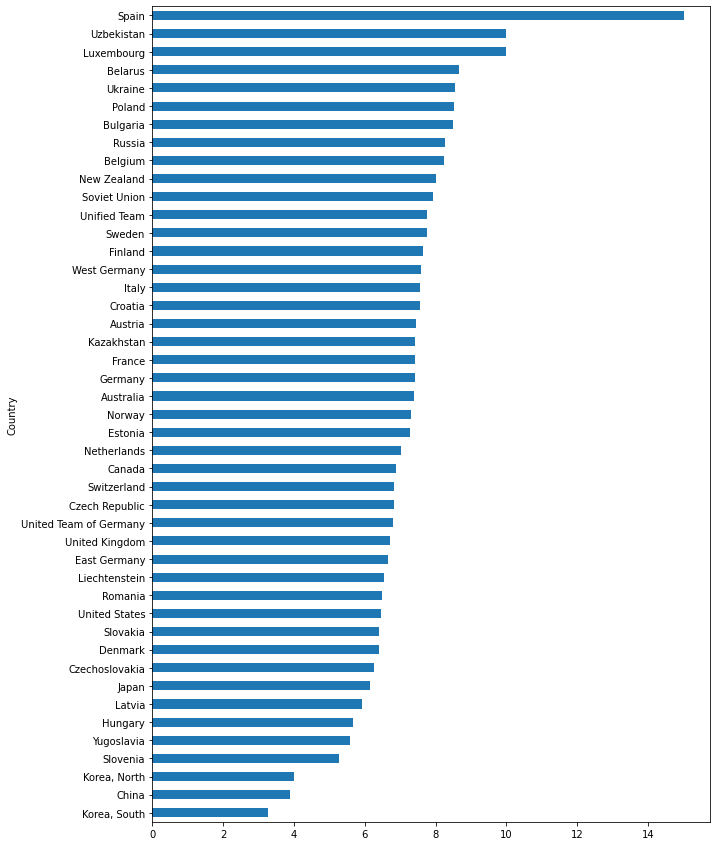

In [50]:
last_names.groupby('Country').mean().get('Last_Name_Length').sort_values().plot(kind='barh', figsize=[10, 15])
country_shortest_name = 'KOR'

In [51]:
grader.check("q4_9")

q4_9 passed!

## 5. Histograms

Suppose we have a table called `data` with two numerical columns, "x" and "y". Consider the following scatter plot, which was generated by calling `data.plot(kind='scatter', x='x', y='y')`:

![](data/scatter.png)

Now consider these two histograms:

**Histogram A**:

![](data/hist_one.png)

**Histogram B**:

![](data/hist_two.png)

**Question 5.1.** Which of these two lines of code generated Histogram B?
 1. `data.plot(kind='hist', y='x')`
 2. `data.plot(kind='hist', y='y')`  
 
 Which line generated Histogram B? Assign either `1` or `2` to `which_histogram`.

In [52]:
which_histogram = 1

In [53]:
grader.check("q5_1")

q5_1 passed!

**Question 5.2.** Suppose we run this line of code:

    new_data = bpd.DataFrame().assign(
        x = data.get('x') / 2,
        y = data.get('y')
    )
    
 We then run `new_data.plot(kind = 'hist', y='x')`. What does the new histogram look like (as opposed to `data.plot(kind = 'hist', y='x')` on the same scale)?

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q5_2
manual: true
-->

The new_data shrinks the x data by half. So when we plot the as above, the y axis will now be shorter as there will be less data.

<!-- END QUESTION -->



**Question 5.3.** According to the histograms above, approximately what percent of points in the scatterplot have an `y` value between 1 and 2 (inclusive)? Return the number (1 - 4) of the correct percentage listed below in the variable `y_between`.

1. 25
2. 33
3. 50
4. 100

In [54]:
y_between = 2

In [55]:
grader.check("q5_3")

q5_3 passed!

# Finish Line

To submit your assignment:

1. Select `Kernel -> Restart & Run All` to ensure that you have executed all cells, including the test cells.
2. Read through the notebook to make sure everything is fine and all tests passed.
3. Run the cell below to run all tests, and make sure that they all pass.
4. Download your notebook using `File -> Download as -> Notebook (.ipynb)`, then upload your notebook to Gradescope.

In [56]:
grader.check_all()

q1_1 passed!

q1_2 passed!

q1_3 passed!

q1_4 passed!

q1_5 passed!

q2_1 passed!

q2_4 passed!

q2_5 passed!

q3_1 passed!

q3_2 passed!

q3_4 passed!

q4_1 passed!

q4_2 passed!

q4_3 passed!

q4_4 passed!

q4_5 passed!

q4_6 passed!

q4_7 passed!

q4_8 passed!

q4_9 passed!

q5_1 passed!

q5_3 passed!